# House Price Regression - Kaggle Competition

This project shows the process of how I used the data to predict house prices. I decided to participate in this competition for the sole purpose of learning data science and specifically data cleaning and wrangling. I am obviously just getting started and I am still learning. I will continue to improve my predictions, but this is what I've got so far. 

Start off by importing necessary libraries

In [7]:
!pip3 install numpy
!pip3 install pandas
!pip3 install seaborn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.5/164.5 kB 1.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 766.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 1.7 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.4/255.4 kB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 2.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 1.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 446.8 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update,

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Import the dataset

In [13]:
dataset = pd.read_csv("train.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We can see below that each column has 1460 rows, 79 variables that effect the sales price.

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We first split the dataset into numerical components and categorical components
(I should have split the dataset into the training set and test set before doing anything. I did end up doing so in the end)

In [33]:
numerical_df = dataset.select_dtypes(include=['number'])
non_numerical_df = dataset.select_dtypes(exclude=['number'])

In [37]:
# Remove id and sale price
numerical_df = numerical_df.iloc[:, 1:-1]

In [38]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

We first analyze the numerical variables. Dealing with categorical data will come later.

In [42]:
numerical_df["GarageYrBlt"]

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

<Axes: >

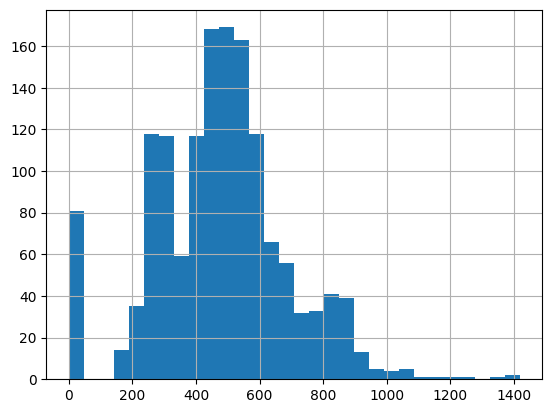

In [49]:
numerical_df["GarageArea"].hist(bins=30)

<Axes: >

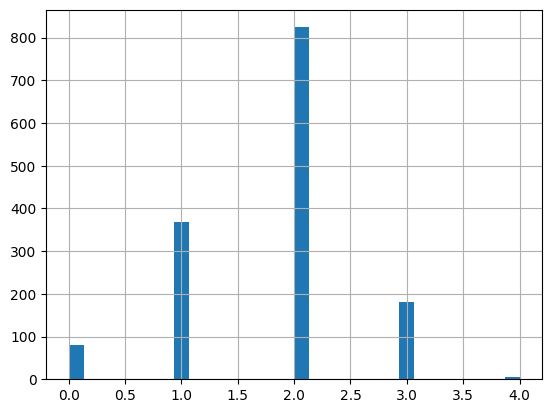

In [50]:
numerical_df["GarageCars"].hist(bins=30)

In [60]:
dataset["MasVnrType"].isnull().sum()

np.int64(872)

We now look at how we can deal with missing values

In [41]:
numerical_df.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

Text(0.5, 1.0, 'MSSubClass')

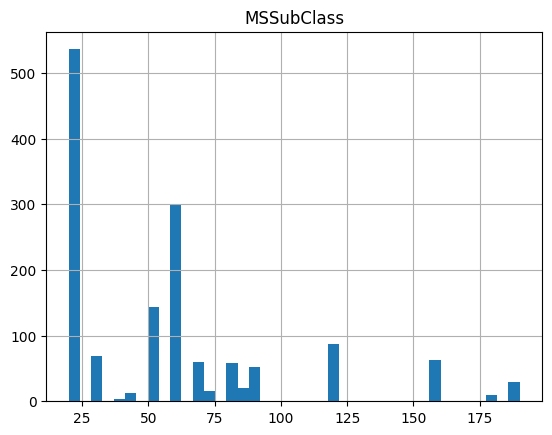

In [71]:
dataset["MSSubClass"].hist(bins=40)
plt.title('MSSubClass')


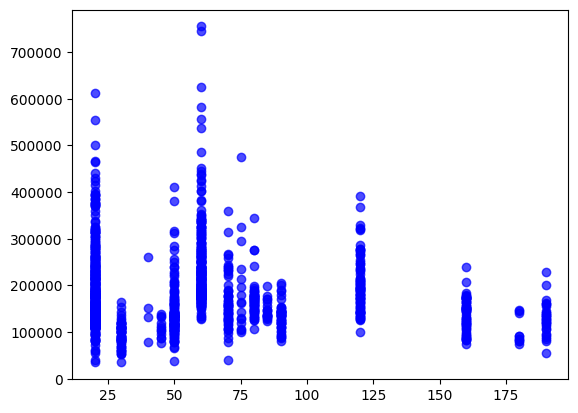

In [75]:
plt.scatter(dataset["MSSubClass"], dataset["SalePrice"], color='blue', alpha=0.7)

Looks like we have missing values for LotFrontage, MasVnrArea and GarageYrBlt

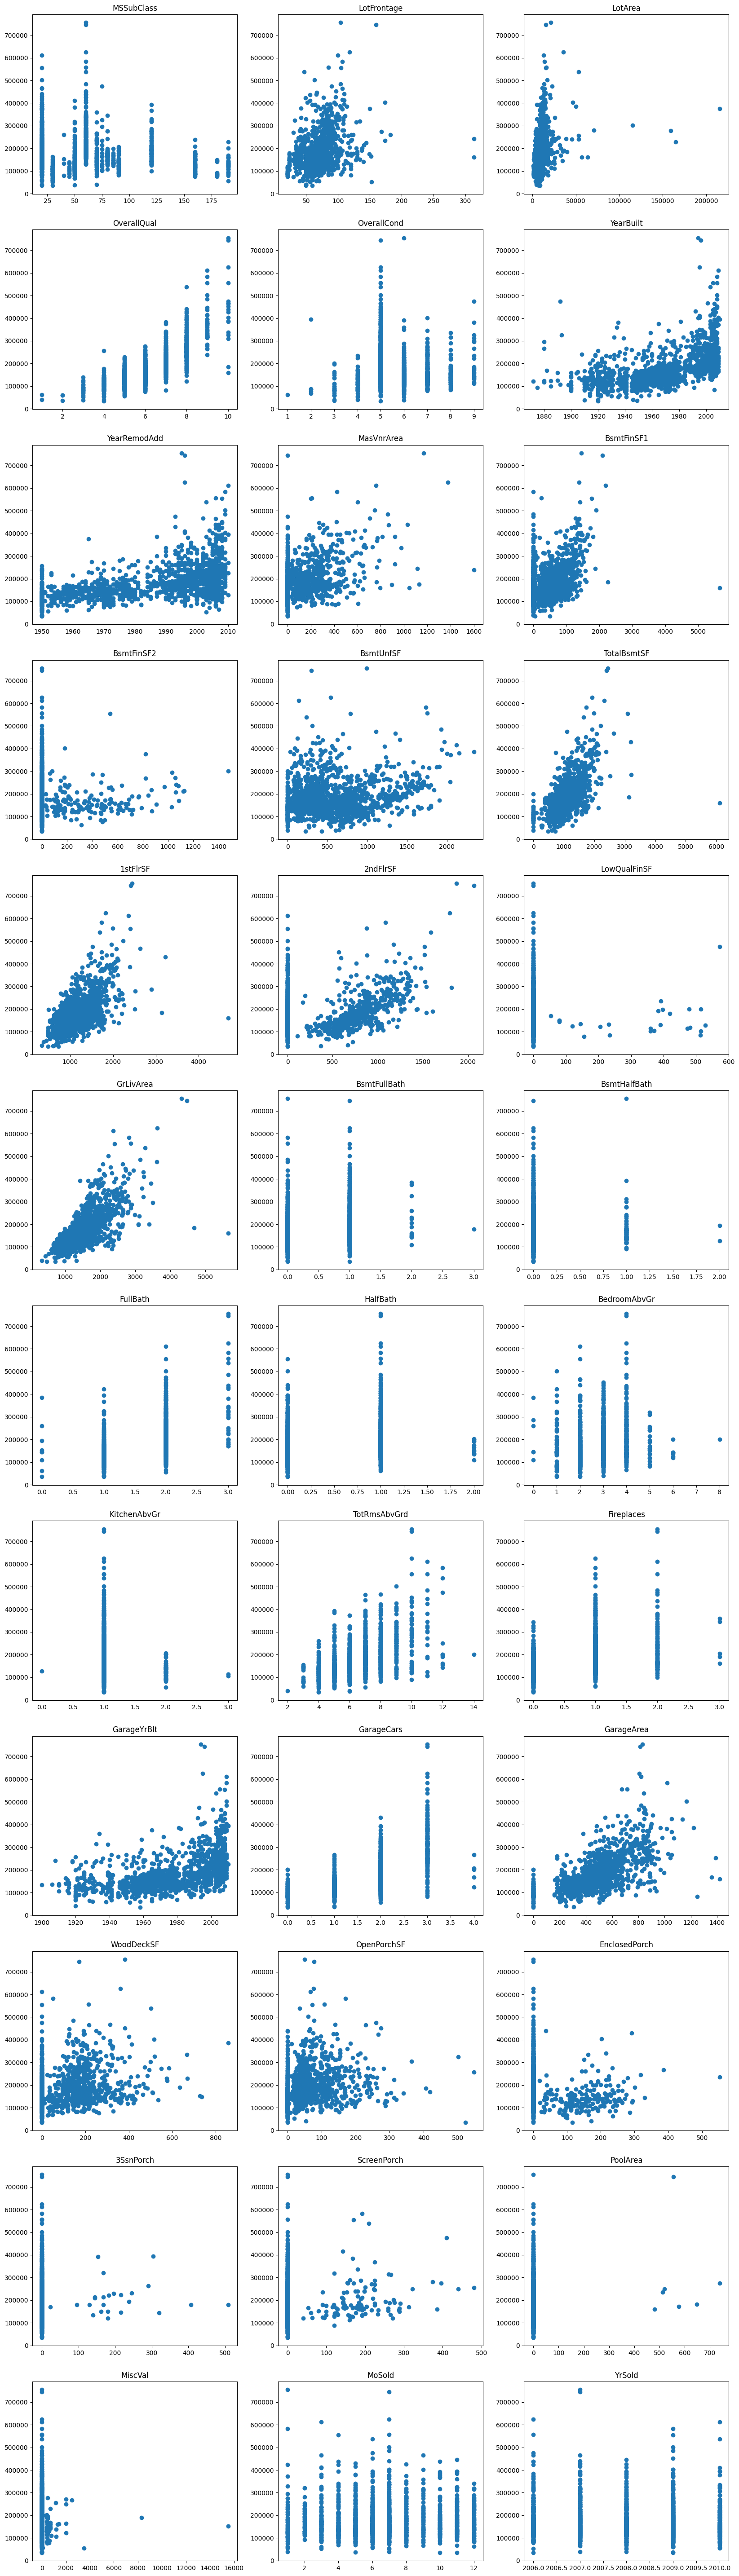

In [76]:
# We look at the scatter plot of other variables
scatterplots = plt.figure(figsize=(20, 30))

for c, index in enumerate(numerical_df.columns, 1):
    scatterplots = plt.subplot(12, 3, c)
    plt.scatter(x=dataset[index], y = dataset["SalePrice"])
    plt.title(index)
    plt.subplots_adjust(top = 2)

In [93]:
DaSold = dataset[['YrSold', 'MoSold']].assign(Day=1)
DaSold.rename(columns={'YrSold': 'Year', 'MoSold': 'Month'}, inplace=True)
DaSold = pd.to_datetime(DaSold)

In [ ]:
#

In [108]:
YrSold = dataset["SalePrice"]
# Create a new DataFrame with the 'Date' column from df1 and 'Value' column from df2
ts = pd.concat([YrSold, DaSold], axis=1)
ts.rename(columns={0: 'DaSold'}, inplace=True)
ts.sort_values(by='DaSold', inplace=True)

In [122]:
ts

,SalePrice,DaSold
810,181000,2006-01-01
996,136500,2006-01-01
664,423000,2006-01-01
302,205000,2006-01-01
141,260000,2006-01-01
...,...,...
1160,146000,2010-07-01
1144,80000,2010-07-01
1421,127500,2010-07-01
66,180000,2010-07-01


In [125]:
meanprice = ts.groupby("DaSold")["SalePrice"].mean().reset_index()

In [126]:
countprice = ts.groupby("DaSold")["SalePrice"].count().reset_index()

(array([13149., 13330., 13514., 13695., 13879., 14061., 14245., 14426.,
        14610., 14791.]),
 [Text(13149.0, 0, '2006-01'),
  Text(13330.0, 0, '2006-07'),
  Text(13514.0, 0, '2007-01'),
  Text(13695.0, 0, '2007-07'),
  Text(13879.0, 0, '2008-01'),
  Text(14061.0, 0, '2008-07'),
  Text(14245.0, 0, '2009-01'),
  Text(14426.0, 0, '2009-07'),
  Text(14610.0, 0, '2010-01'),
  Text(14791.0, 0, '2010-07')])

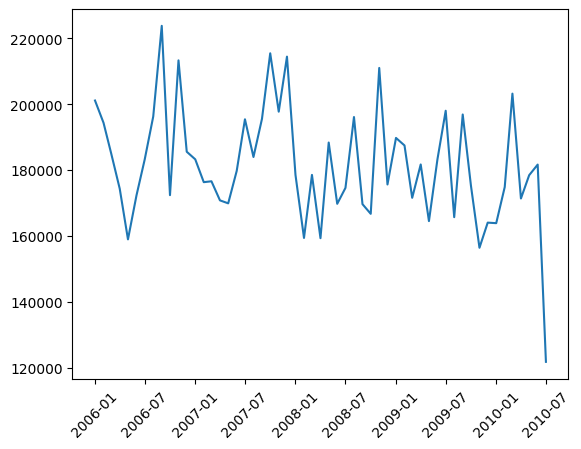

In [127]:
plt.plot(meanprice["DaSold"], meanprice["SalePrice"])
plt.xticks(rotation=45)

(array([13149., 13330., 13514., 13695., 13879., 14061., 14245., 14426.,
        14610., 14791.]),
 [Text(13149.0, 0, '2006-01'),
  Text(13330.0, 0, '2006-07'),
  Text(13514.0, 0, '2007-01'),
  Text(13695.0, 0, '2007-07'),
  Text(13879.0, 0, '2008-01'),
  Text(14061.0, 0, '2008-07'),
  Text(14245.0, 0, '2009-01'),
  Text(14426.0, 0, '2009-07'),
  Text(14610.0, 0, '2010-01'),
  Text(14791.0, 0, '2010-07')])

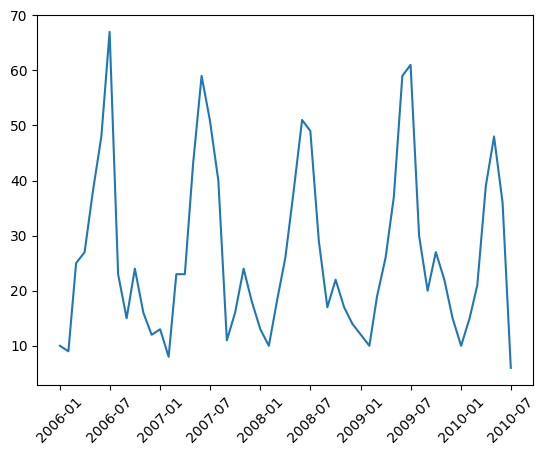

In [128]:
plt.plot(countprice["DaSold"], countprice["SalePrice"])
plt.xticks(rotation=45)

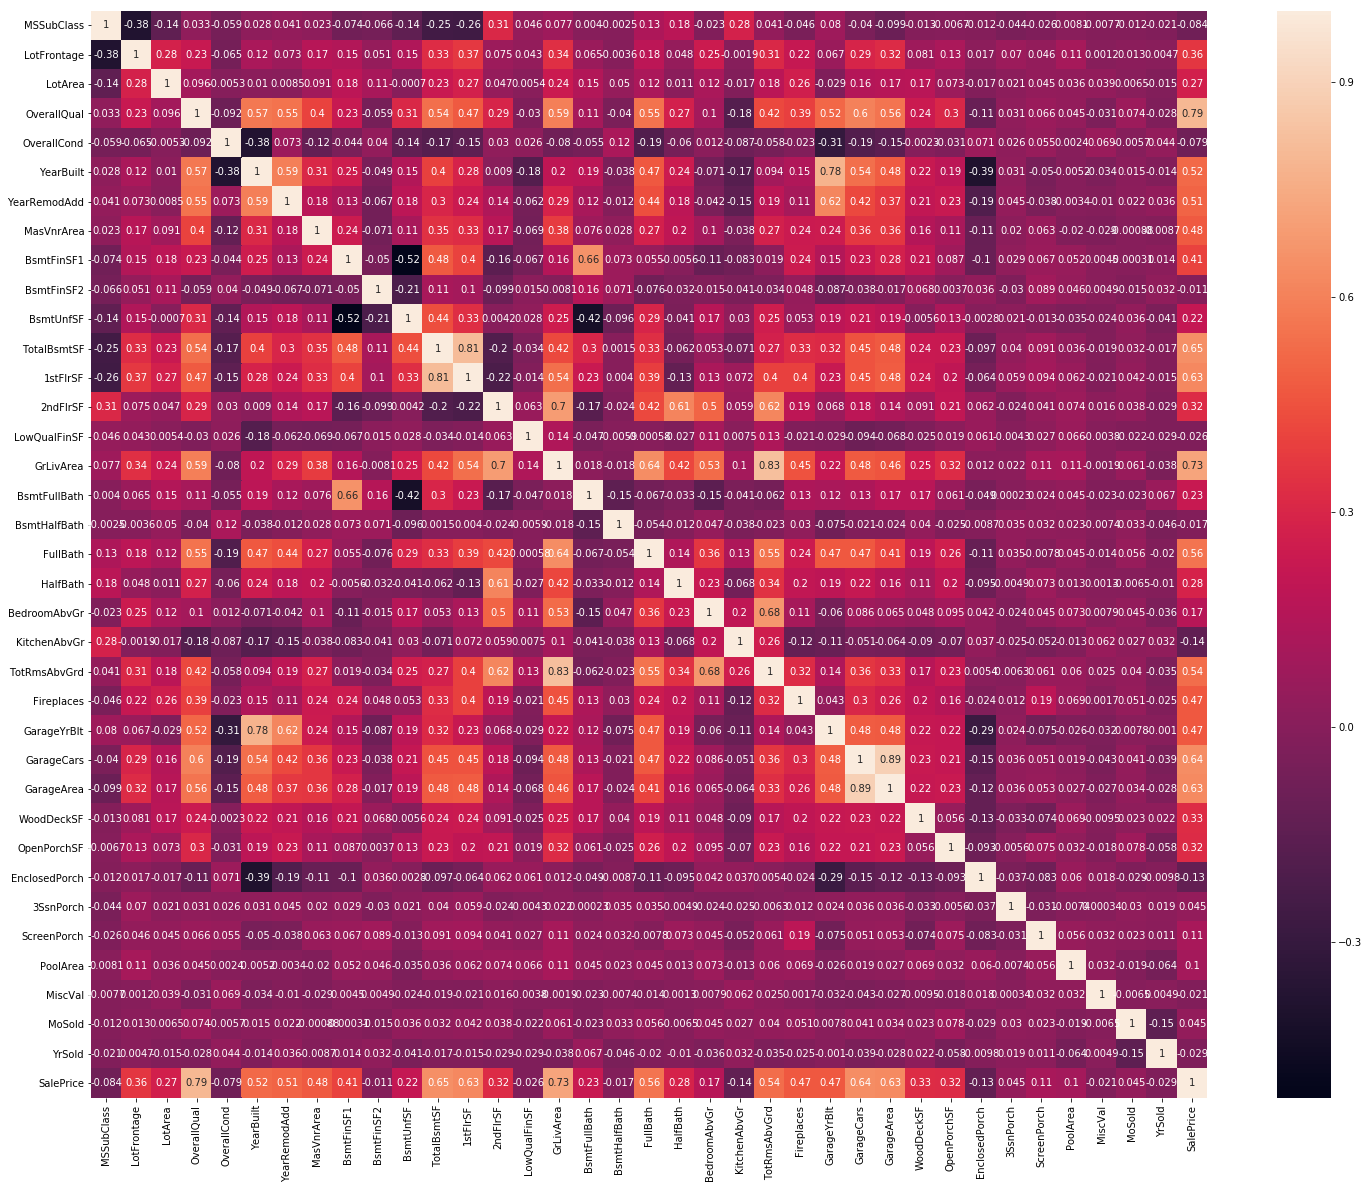

In [13]:
#Add the SalePrice to num_col
num_col.append("SalePrice")

#plot the heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(dataset[num_col].corr(), annot=True)

In [15]:
# We removed uncorrelated variables such as MSSubClass for our model

# Notice YearBuilt and GarageYrBlt are highly correlated with each other so they provide no further information for us
# Therfore, we remove the one with lower correlation with the SalePrice (GarageYrBlt in this case).
# We remove all instances of this with other variables
# Some variables are related to categorical variables such as "MasVnrArea" and "MasVnrType" we remove those for now
corr_var = ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 
            'TotalBsmtSF', 'GrLivArea', 'Fireplaces', 'GarageCars']

We now divide the dataset into a training set and test set (should've been done at the beginning)

In [16]:
from sklearn.model_selection import train_test_split
X = dataset[corr_var]
y = dataset['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now, I am not entirely sure whether I'm doing things correctly and I definitely need to get more dirty. I also need to deal with the categorical variables. 

But I kind of wanted to see what happens if I used this data for training our model.

I decided to use a Random Forest Regressor because it is a tree based model that does not require me to do feature scaling. And I haven't normalized any of my variables.

Again we get help from sklearn to do all the dirty work for us

In [17]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10000, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [18]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(x_test)
r2_score(y_test, y_pred) 

0.90435699880942466

Finally, we on our final steps to predict the house prices that we will submit to kaggle.

We first take a look at the missing values for our final dataset

In [19]:
final_dataset = pd.read_csv("test.csv")
x_final = final_dataset[corr_var]
x_final.isnull().sum()

LotFrontage     227
LotArea           0
OverallQual       0
YearBuilt         0
YearRemodAdd      0
BsmtFinSF1        1
BsmtUnfSF         1
TotalBsmtSF       1
GrLivArea         0
Fireplaces        0
GarageCars        1
dtype: int64

We will impute the missing values with the mean and then get our final house prices

In [21]:
imputer_final = SimpleImputer(missing_values = np.nan, strategy = 'mean')
x_final = imputer_final.fit_transform(x_final)
y_final = regressor.predict(x_final) 

In [22]:
y_final

array([ 125583.002     ,  155456.868     ,  191760.16914667, ...,
        161114.6914    ,  115974.9699    ,  237548.0442    ])

Finally we will export the sale price for submission

In [23]:
df = pd.DataFrame(y_final)
df.columns = ["SalePrice"]
df.index.names = ["Id"]
df.index = df.index + 1461

In [24]:
df.to_csv('submission.csv')

In the end, I ranked around 3000th place out of around 4600 people.
So for next time, I will focus on 